# Empirical Method in Financial Econometrics: Project 8

## Name: Xijie Zhou

## Exercise 1

### A

In [86]:
prices = [142.19,142.27,142.29,142.62,142.70,142.64,142.61,142.62,142.63,142.67,142.62,142.50,142.45,142.57,142.54,142.32,142.17,142.03,141.85,141.30,141.36,141.01,140.78,140.96,141.16,141.38]

In [87]:
len_prices = len(prices)

In [88]:
print(len_prices)

26


In [89]:
freq_prices = (5*78/len_prices)

In [90]:
print(freq_prices)

15.0


The sampling frequency of the prices above is every 15-minutes 1 observation.

### B

In [200]:
import math
log_returns = []
for i in range(1,len(prices)):
    log_returns.append(math.log(prices[i]) - math.log(prices[i-1]))

### C

In [92]:
import statistics as stat
average_return = stat.mean(log_returns)
print(average_return)

-0.00022851562661898583


In [93]:
standard_deviation = stat.stdev(log_returns)
print(standard_deviation)

0.0013378543298329293


The average return is about -0.0002285; and the standard deviation of the returns is 0.0013379.

### D

In [94]:
def realized_variance(log_returns):
    rv = 0
    for r in log_returns:
        rv += r**2
    return rv

In [95]:
RV = realized_variance(log_returns)
annulized_RV = 100*math.sqrt(252*RV)
print(RV)
print(annulized_RV)

4.426198577869189e-05
10.561259591653997


The annulized value is 10.56125959%.

### E

In [96]:
print(0.1 + 0.2 == 0.3)

False


In [97]:
print(sum([0.1,0.2]) == 0.3)

False


In [98]:
print(0.1 + 0.2)

0.30000000000000004


In [99]:
print(sum([0.1,0.2]))

0.30000000000000004


Because as we can see, the original equations are wrong, like 0.1+0.2 is not exactly equal to 3. This situation can be find in other programming tools like C, C++, Java and so on。The reason is that binary can't accurately describe decimal fractions, so there is an error in the operation of float. I think this issue could not affect the computation of the realized variance, because the space for float is enough.

### F

   sum function: Return the sum of a 'start' value (default: 0) plus an iterable of numbers. When the iterable is empty, return the start value. This function is intended specifically for use with numeric values and may reject non-numeric types.

 fsum function: Return an accurate floating point sum of values in the iterable seq. Assumes IEEE-754 floating point arithmetic.

In [100]:
r = []
for i in range(0,len(log_returns)):
    r.append(log_returns[i]**2)
    RV = math.fsum(r)
annulized_RV = 100*math.sqrt(252*RV)
print(annulized_RV)

10.561259591653997


Compared to the two results, I think they are same.

### G

In [101]:
b = []
for i in range(1,len(log_returns)):
    b.append(abs(log_returns[i])*abs(log_returns[i-1]))
    BV = math.fsum(b) * math.pi/2
annulized_BV = 100*math.sqrt(252*BV)
print(annulized_BV)

9.997816709510156


The annulized value is 9.9978167%.

## Excercise 2 - DIS

### A

In [167]:
import os
os.getcwd()
os.chdir("/Users/zhouxijie/python/project_8/data/")

In [168]:
import csv
with open("DIS.csv","r") as  data:
    content = data.read()

In [169]:
data_lines = content.split("\n")

In [170]:
dates, times, prices = [], [], []
for line in data_lines:
    if line:
        date, time, price = line.split(',')
        dates.append(int(date))
        times.append(int(time))
        prices.append(float(price))

### B

In [171]:
N = dates.count(dates[0])
T = len(dates)//dates.count(dates[0])
print(N)
print(T)

78
2769


There are 78 observations available each day and 2769 days available in the sample.

### C

In [172]:
new_list = [prices[i:i+N] for i in range(0, len(prices), N)]

### D

In [173]:
log_prices = [math.log(price) for price in prices]
log_list = [log_prices[i:i+N] for i in range(0, len(log_prices), N)]
log_returns = []
for i in range(len(log_list)):
    log_returns.append([log_list[i][j+1] - log_list[i][j] for j in range(len(log_list[0])-1)])

### E

In [199]:
RV_new = [realized_variance(rlist) for rlist in log_returns]

### F

In [175]:
average_rv = stat.mean(RV_new)
annulized_av_rv = 100*math.sqrt(252*average_rv)
print(annulized_av_rv)

21.778821985923436


In [176]:
median_rv = stat.median(RV_new)
annulized_md_rv = 100*math.sqrt(252*median_rv)
print(annulized_md_rv)

15.019035530425818


The average of the realized variance is 21.78%; the median of the realized variance is 15.02%.

## Exercise 3 - DIS

### A

In [177]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'The realized variance for all days')

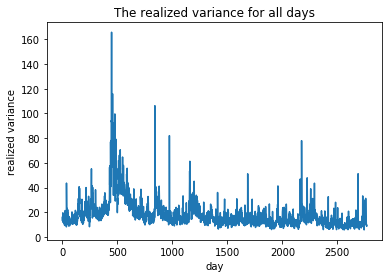

In [178]:
plt.plot([math.sqrt(rv*252)*100 for rv in RV_new])
plt.xlabel('day')
plt.ylabel('realized variance')
plt.title('The realized variance for all days')

### B

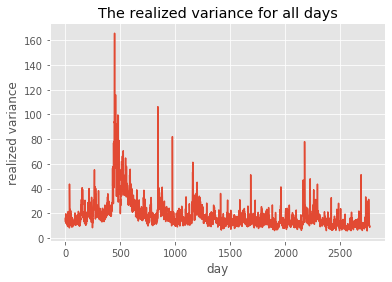

In [179]:
with plt.style.context("ggplot"):
    plt.plot([math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('day')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')

### C

In [180]:
from datetime import datetime
print(datetime(2017, 11, 20))
print(datetime.strptime('20171120 0927', '%Y%m%d %H%M'))

2017-11-20 00:00:00
2017-11-20 09:27:00


When using the method strptime, the format for %H is from 01 to 12, so we need to type '09' other than '9' for python to recognize this format. %Y means year, %m means month, %d means day, %M means minute.

### D

In [181]:
zipped = list(zip(dates, times))
dt = []
for time in zipped:
    if time[1]//1000 < 1:
        dt.append([str(time[0]) + " " + '0' + str(time[1])])
    else:
        dt.append([str(time[0]) + ' ' + str(time[1])])
print(dt[0])

['20070103 0935']


### E

In [182]:
format_dt = [datetime.strptime(str(dt[0]), '%Y%m%d %H%M') for dt in dt]

In [183]:
dts = []
for t in range(0,len(dt)):
    subdt = []
    for i in range(0,len(dt[t])):
        time = datetime.strptime(dt[t][i],'%Y%m%d %H%M')
        subdt.append(time)
    dts.append(subdt)

### F

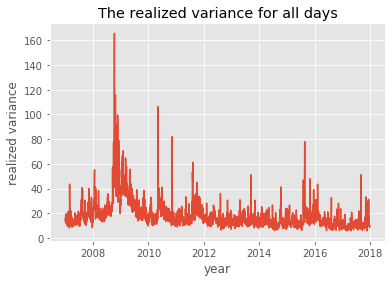

In [184]:
with plt.style.context("ggplot"):
    dtx = [datetime.strptime(str(dates[i]), '%Y%m%d') for i in range(0, len(dates), N)]
    plt.plot(dtx, [math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('year')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')

### G

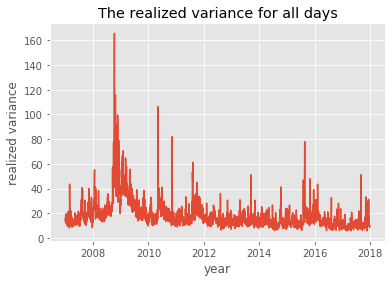

In [185]:
with plt.style.context("ggplot"):
    dtx = [datetime.strptime(str(dates[i]), '%Y%m%d') for i in range(0, len(dates), N)]
    plt.plot(dtx, [math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('year')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')

## Excercise 2 - PG

### A

In [186]:
import os
os.getcwd()
os.chdir("/Users/zhouxijie/python/project_8/data/")
import csv
with open("PG.csv","r") as  data:
    content = data.read()
data_lines = content.split("\n")
dates, times, prices = [], [], []
for line in data_lines:
    if line:
        date, time, price = line.split(',')
        dates.append(int(date))
        times.append(int(time))
        prices.append(float(price))

### B

In [187]:
N = dates.count(dates[0])
T = len(dates)//dates.count(dates[0])
print(N)
print(T)

78
2769


There are 78 observations available each day and 2769 days available in the sample.

### C

In [188]:
new_list = [prices[i:i+N] for i in range(0, len(prices), N)]

### D

In [189]:
log_prices = [math.log(price) for price in prices]
log_list = [log_prices[i:i+N] for i in range(0, len(log_prices), N)]
log_returns = []
for i in range(len(log_list)):
    log_returns.append([log_list[i][j+1] - log_list[i][j] for j in range(len(log_list[0])-1)])

### E

In [190]:
RV_new = [realized_variance(rlist) for rlist in log_returns]

### F

In [191]:
average_rv = stat.mean(RV_new)
annulized_av_rv = 100*math.sqrt(252*average_rv)
print(annulized_av_rv)
median_rv = stat.median(RV_new)
annulized_md_rv = 100*math.sqrt(252*median_rv)
print(annulized_md_rv)

15.624203800306113
11.364598799912011


The average of the realized variance is 15.62%; the median of the realized variance is 11.36%.

## Exercise 3 - PG

### A

Text(0.5, 1.0, 'The realized variance for all days')

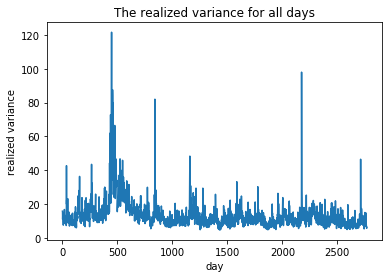

In [192]:
import matplotlib.pyplot as plt
plt.plot([math.sqrt(rv*252)*100 for rv in RV_new])
plt.xlabel('day')
plt.ylabel('realized variance')
plt.title('The realized variance for all days')

### B

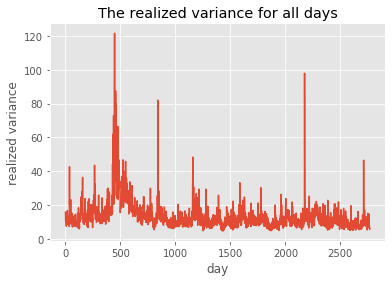

In [193]:
with plt.style.context("ggplot"):
    plt.plot([math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('day')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')

### C

In [194]:
from datetime import datetime
print(datetime(2017, 11, 20))
print(datetime.strptime('20171120 0927', '%Y%m%d %H%M'))

2017-11-20 00:00:00
2017-11-20 09:27:00


When using the method strptime, the format for %H is from 01 to 12, so we need to type '09' other than '9' for python to recognize this format. %Y means year, %m means month, %d means day, %M means minute.

### D

In [195]:
zipped = list(zip(dates, times))
dt = []
for time in zipped:
    if time[1]//1000 < 1:
        dt.append([str(time[0]) + " " + '0' + str(time[1])])
    else:
        dt.append([str(time[0]) + ' ' + str(time[1])])
print(dt[0])

['20070103 0935']


### E

In [196]:
format_dt = [datetime.strptime(str(dt[0]), '%Y%m%d %H%M') for dt in dt]
dts = []
for t in range(0,len(dt)):
    subdt = []
    for i in range(0,len(dt[t])):
        time = datetime.strptime(dt[t][i],'%Y%m%d %H%M')
        subdt.append(time)
    dts.append(subdt)

### F

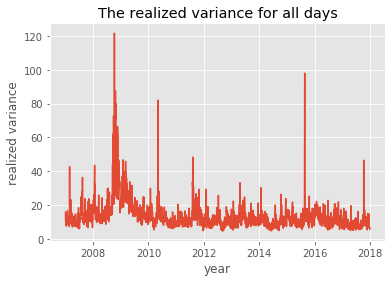

In [197]:
with plt.style.context("ggplot"):
    dtx = [datetime.strptime(str(dates[i]), '%Y%m%d') for i in range(0, len(dates), N)]
    plt.plot(dtx, [math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('year')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')

### G

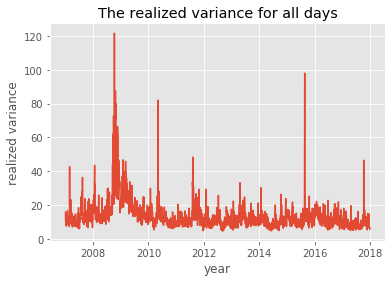

In [198]:
with plt.style.context("ggplot"):
    dtx = [datetime.strptime(str(dates[i]), '%Y%m%d') for i in range(0, len(dates), N)]
    plt.plot(dtx, [math.sqrt(rv*252)*100 for rv in RV_new])
    plt.xlabel('year')
    plt.ylabel('realized variance')
    plt.title('The realized variance for all days')